In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/Detalles_clientes.csv",index_col=False)

In [10]:
print(df.columns)
df.info()

Index(['Id_cliente', 'fecha_efectiva', 'Id_tx', 'clase', 'valor'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id_cliente      2448 non-null   int64  
 1   fecha_efectiva  2448 non-null   int64  
 2   Id_tx           2448 non-null   int64  
 3   clase           2448 non-null   object 
 4   valor           2448 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 95.8+ KB


In [11]:
df['valor'] = df['valor'].astype(str).str.replace("'", "")
df['valor'] = pd.to_numeric(df['valor'], errors='coerce')
df['clase'] = df['clase'].astype('category')
df['fecha_efectiva'] = pd.to_datetime(df['fecha_efectiva'], format='%Y%m%d')

Iniciando Fase 1: Análisis Exploratorio de Datos (EDA) 📊

### 1. Análisis Estadístico General ###
Número de clientes únicos: 70
Número de transacciones totales: 2448

Estadísticas del valor de las transacciones:
count        2,448.00
mean       375,839.60
std        583,485.29
min             20.00
25%         61,469.75
50%        164,844.50
75%        485,102.25
max      7,952,039.23
Name: valor, dtype: object
----------------------------------------------------------

### 2. Análisis por Tipo de Transacción (COMPRA vs AVANCE) ###

Distribución de transacciones por clase:
clase
COMPRA    1897
AVANCE     551
Name: count, dtype: int64

Valor total por clase:
clase
AVANCE    243,833,500.00
COMPRA    676,221,848.00
Name: valor, dtype: object


C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_5612\3830303716.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clase_valor = df.groupby('clase')['valor'].sum()
C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_5612\3830303716.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='clase', data=df, palette='viridis', order=clase_counts.index)


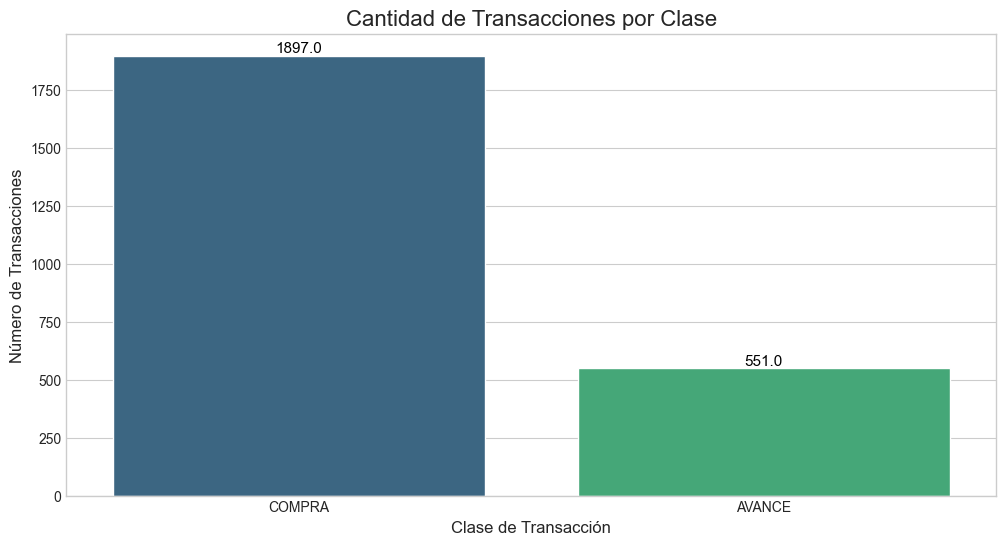

C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_5612\3830303716.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clase', y='valor', data=df, palette='magma')


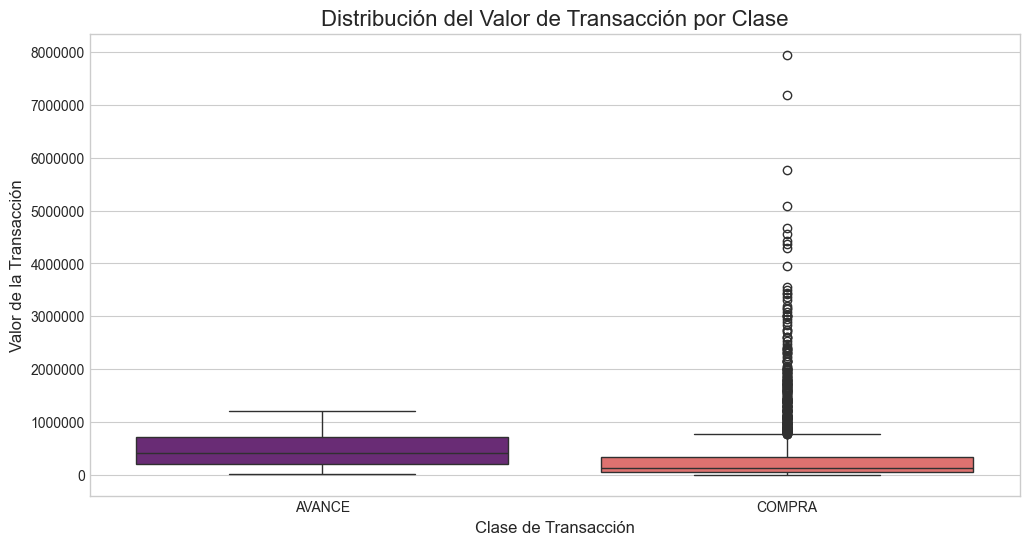

C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_5612\3830303716.py:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_summary = df_time.resample('M').agg(


----------------------------------------------------------

### 3. Análisis Temporal ###

Resumen mensual de transacciones:
                numero_transacciones   valor_total
fecha_efectiva                                    
2020-09-30                       350  1.320393e+08
2020-10-31                       402  1.482522e+08
2020-11-30                       454  1.754049e+08
2020-12-31                       472  1.637759e+08
2021-01-31                       319  1.087342e+08
2021-02-28                       378  1.578312e+08
2021-03-31                        73  3.401747e+07


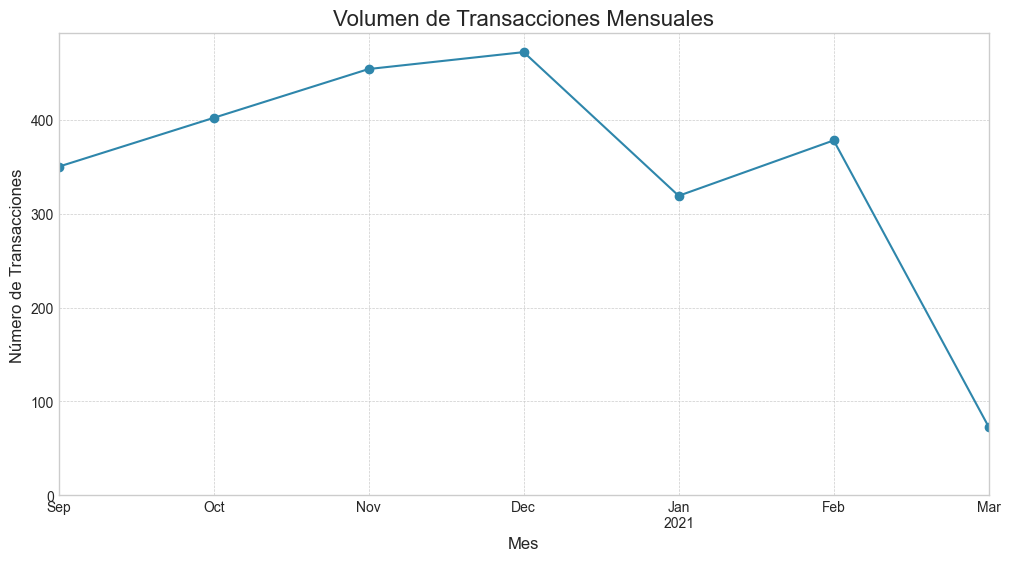

C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_5612\3830303716.py:90: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  valor_por_clase_mes = df_time.groupby([pd.Grouper(freq='M'), 'clase'])['valor'].sum().unstack()
C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_5612\3830303716.py:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valor_por_clase_mes = df_time.groupby([pd.Grouper(freq='M'), 'clase'])['valor'].sum().unstack()


<Figure size 1200x600 with 0 Axes>

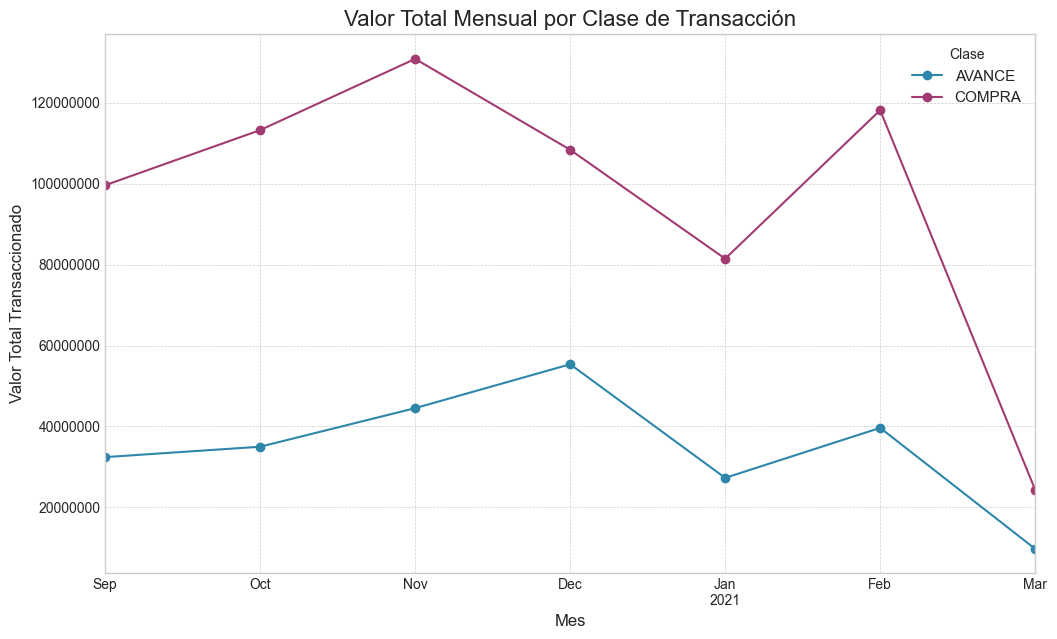


Análisis Descriptivo Completado ✅


In [12]:
# --- Configuración de Estilo para los Gráficos ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

print("Iniciando Fase 1: Análisis Exploratorio de Datos (EDA) 📊")
print("==========================================================")


# --- 1. Análisis Estadístico General ---
print("\n### 1. Análisis Estadístico General ###")

# Clientes y transacciones totales
num_clientes = df['Id_cliente'].nunique()
num_transacciones = len(df)
print(f"Número de clientes únicos: {num_clientes}")
print(f"Número de transacciones totales: {num_transacciones}")

# Estadísticas descriptivas de la columna 'valor'
print("\nEstadísticas del valor de las transacciones:")
print(df['valor'].describe().apply('{:,.2f}'.format))
print("----------------------------------------------------------")


# --- 2. Análisis por Tipo de Transacción (clase) ---
print("\n### 2. Análisis por Tipo de Transacción (COMPRA vs AVANCE) ###")

# Conteo y valor por clase
clase_counts = df['clase'].value_counts()
clase_valor = df.groupby('clase')['valor'].sum()

print("\nDistribución de transacciones por clase:")
print(clase_counts)
print("\nValor total por clase:")
print(clase_valor.apply('{:,.2f}'.format))

# Gráfico 1: Cantidad de transacciones por clase
plt.figure()
ax = sns.countplot(x='clase', data=df, palette='viridis', order=clase_counts.index)
ax.set_title('Cantidad de Transacciones por Clase')
ax.set_xlabel('Clase de Transacción')
ax.set_ylabel('Número de Transacciones')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# Gráfico 2: Distribución del valor por clase
plt.figure()
sns.boxplot(x='clase', y='valor', data=df, palette='magma')
plt.title('Distribución del Valor de Transacción por Clase')
plt.xlabel('Clase de Transacción')
plt.ylabel('Valor de la Transacción')
plt.ticklabel_format(style='plain', axis='y') # Evita notación científica
plt.show()
print("----------------------------------------------------------")


# --- 3. Análisis Temporal (fecha_efectiva) ---
print("\n### 3. Análisis Temporal ###")

# Aseguramos que el índice sea la fecha para facilitar el re-muestreo
df_time = df.set_index('fecha_efectiva')

# Re-muestreamos por mes para ver tendencias
# 'M' agrupa por fin de mes
monthly_summary = df_time.resample('M').agg(
    numero_transacciones=('Id_tx', 'count'),
    valor_total=('valor', 'sum')
)

print("\nResumen mensual de transacciones:")
print(monthly_summary)

# Gráfico 3: Tendencia del Volumen de Transacciones Mensuales
plt.figure()
monthly_summary['numero_transacciones'].plot(kind='line', marker='o')
plt.title('Volumen de Transacciones Mensuales')
plt.xlabel('Mes')
plt.ylabel('Número de Transacciones')
plt.ylim(bottom=0) # Asegurar que el eje Y empiece en 0
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Gráfico 4: Tendencia del Valor Total Mensual por Clase
plt.figure()
# Pivotamos los datos para tener 'COMPRA' y 'AVANCE' como columnas
valor_por_clase_mes = df_time.groupby([pd.Grouper(freq='M'), 'clase'])['valor'].sum().unstack()

valor_por_clase_mes.plot(kind='line', marker='o', figsize=(12,7))
plt.title('Valor Total Mensual por Clase de Transacción')
plt.xlabel('Mes')
plt.ylabel('Valor Total Transaccionado')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Clase')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

print("\n==========================================================")
print("Análisis Descriptivo Completado ✅")

In [13]:
# --- Configuración Mejorada para Visualizaciones ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'axes.titlesize': 16,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 11,
    'font.size': 10
})

# Paleta de colores personalizada
colores_personalizados = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
sns.set_palette(colores_personalizados)



### 4. Análisis por Cliente ###

Top 10 Clientes por Valor Total:
            Num_Transacciones  Valor_Total  Valor_Promedio  Valor_StdDev  \
Id_cliente                                                                 
129                        83  41458443.34       499499.32     999883.03   
131                        76  38641190.13       508436.71     747391.70   
125                       102  36360751.88       356477.96     505884.84   
120                        71  35026995.45       493337.96    1038687.23   
130                        91  34887908.75       383383.61     621744.66   
128                        84  34560987.53       411440.33     687008.58   
117                        60  34409990.23       573499.84     949405.58   
126                        91  30442240.09       334530.11     569223.45   
124                        89  29717181.55       333900.92     415190.13   
118                        76  29374107.04       386501.41     527592.00   

           Clase_Pri

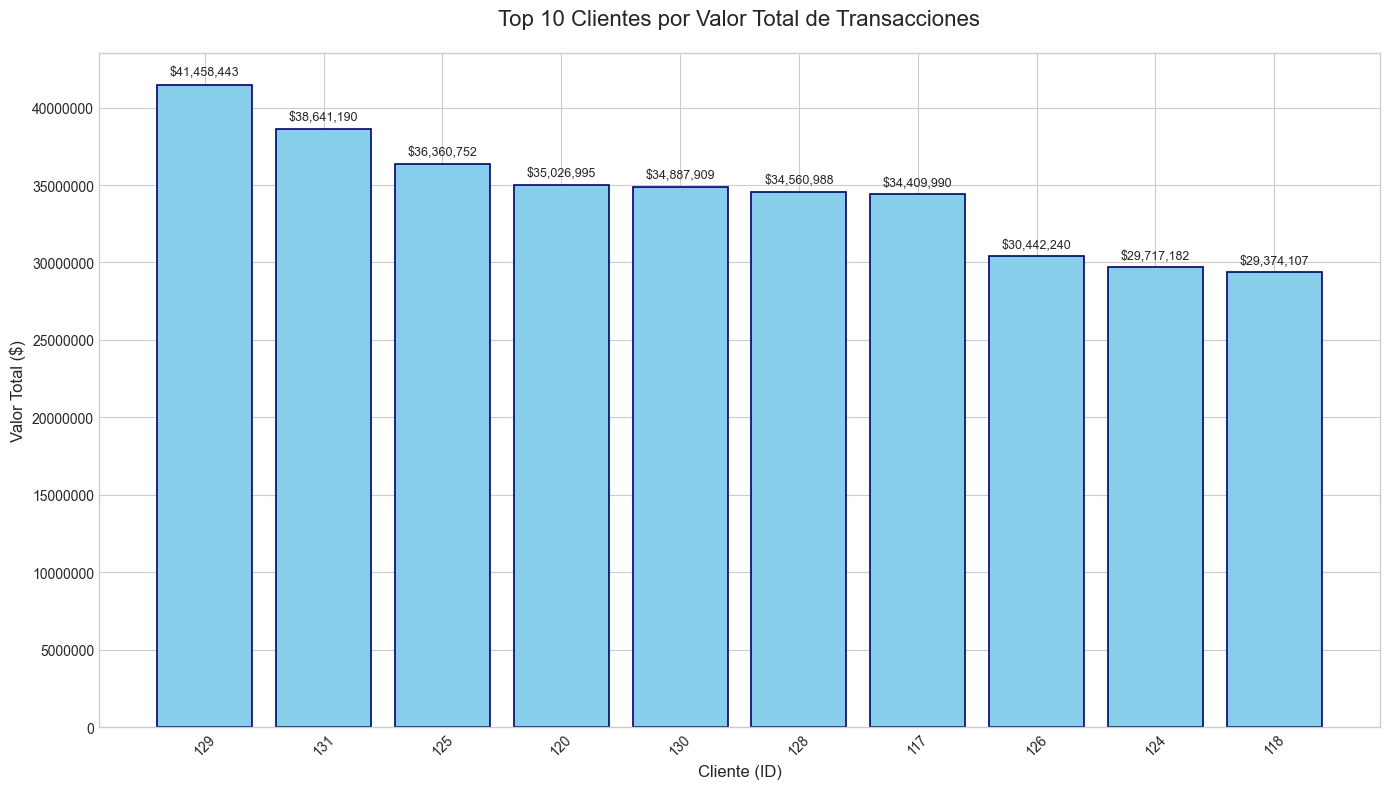

In [14]:
# --- 4. Análisis por Cliente ---
print("\n### 4. Análisis por Cliente ###")

# Estadísticas por cliente
stats_por_cliente = df.groupby('Id_cliente').agg({
    'valor': ['count', 'sum', 'mean', 'std'],
    'clase': lambda x: x.mode().iloc[0]  # Clase más frecuente
}).round(2)

stats_por_cliente.columns = ['Num_Transacciones', 'Valor_Total', 'Valor_Promedio', 'Valor_StdDev', 'Clase_Principal']

# Top 10 clientes por valor total
top_clientes = stats_por_cliente.nlargest(10, 'Valor_Total')
print("\nTop 10 Clientes por Valor Total:")
print(top_clientes)

# Gráfico 5: Top 10 clientes por valor total
plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(top_clientes)), top_clientes['Valor_Total'], 
               color='skyblue', edgecolor='navy', linewidth=1.2)
plt.title('Top 10 Clientes por Valor Total de Transacciones', fontsize=16, pad=20)
plt.xlabel('Cliente (ID)', fontsize=12)
plt.ylabel('Valor Total ($)', fontsize=12)
plt.xticks(range(len(top_clientes)), top_clientes.index, rotation=45)

# Agregar valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=9)

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()



### 7. Segmentación de Clientes ###


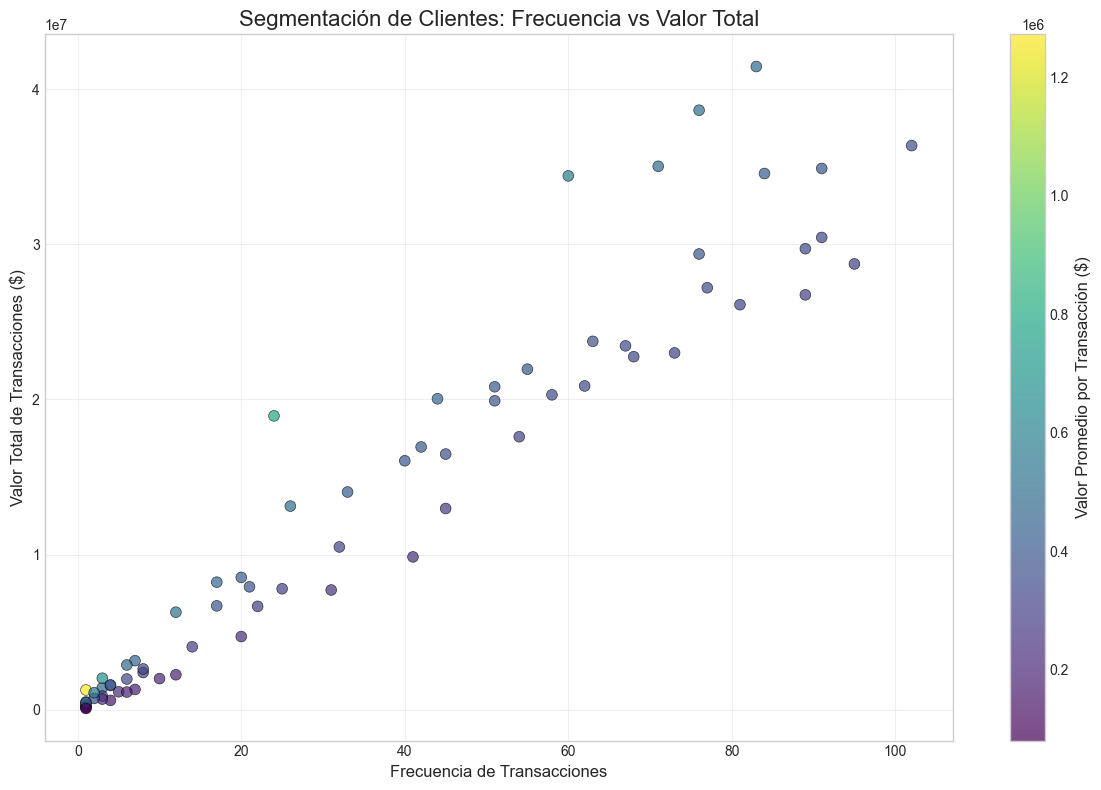


Matriz de Segmentación:
Segmento_Valor  Bajo  Medio-Bajo  Medio-Alto  Alto
Segmento_Freq                                     
Poco_Freq         17           3           0     0
Bajo_Freq          1          12           2     0
Medio_Freq         0           2          14     1
Alto_Freq          0           0           1    17


In [15]:
# --- 7. Segmentación de Clientes ---
print("\n### 7. Segmentación de Clientes ###")

# Crear características para segmentación
cliente_features = df.groupby('Id_cliente').agg({
    'valor': ['count', 'sum', 'mean', 'std'],
    'fecha_efectiva': ['min', 'max']
}).round(2)

cliente_features.columns = ['Freq', 'Total', 'Promedio', 'StdDev', 'Primera_Tx', 'Ultima_Tx']
cliente_features['Duracion_Dias'] = (cliente_features['Ultima_Tx'] - cliente_features['Primera_Tx']).dt.days

# Segmentación usando cuartiles
cliente_features['Segmento_Valor'] = pd.qcut(cliente_features['Total'], 
                                           q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])
cliente_features['Segmento_Freq'] = pd.qcut(cliente_features['Freq'], 
                                           q=4, labels=['Poco_Freq', 'Bajo_Freq', 'Medio_Freq', 'Alto_Freq'])

# Gráfico 9: Scatter plot de segmentación
plt.figure(figsize=(12, 8))
scatter = plt.scatter(cliente_features['Freq'], cliente_features['Total'], 
                     c=cliente_features['Promedio'], cmap='viridis', 
                     s=60, alpha=0.7, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Valor Promedio por Transacción ($)')
plt.xlabel('Frecuencia de Transacciones')
plt.ylabel('Valor Total de Transacciones ($)')
plt.title('Segmentación de Clientes: Frecuencia vs Valor Total', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Matriz de segmentación
segmentacion_matrix = pd.crosstab(cliente_features['Segmento_Freq'], 
                                 cliente_features['Segmento_Valor'])
print("\nMatriz de Segmentación:")
print(segmentacion_matrix)



### 8. Dashboard de Métricas Clave ###


C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_5612\2602794782.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transacciones_por_dia = df.groupby('dia_semana').agg(


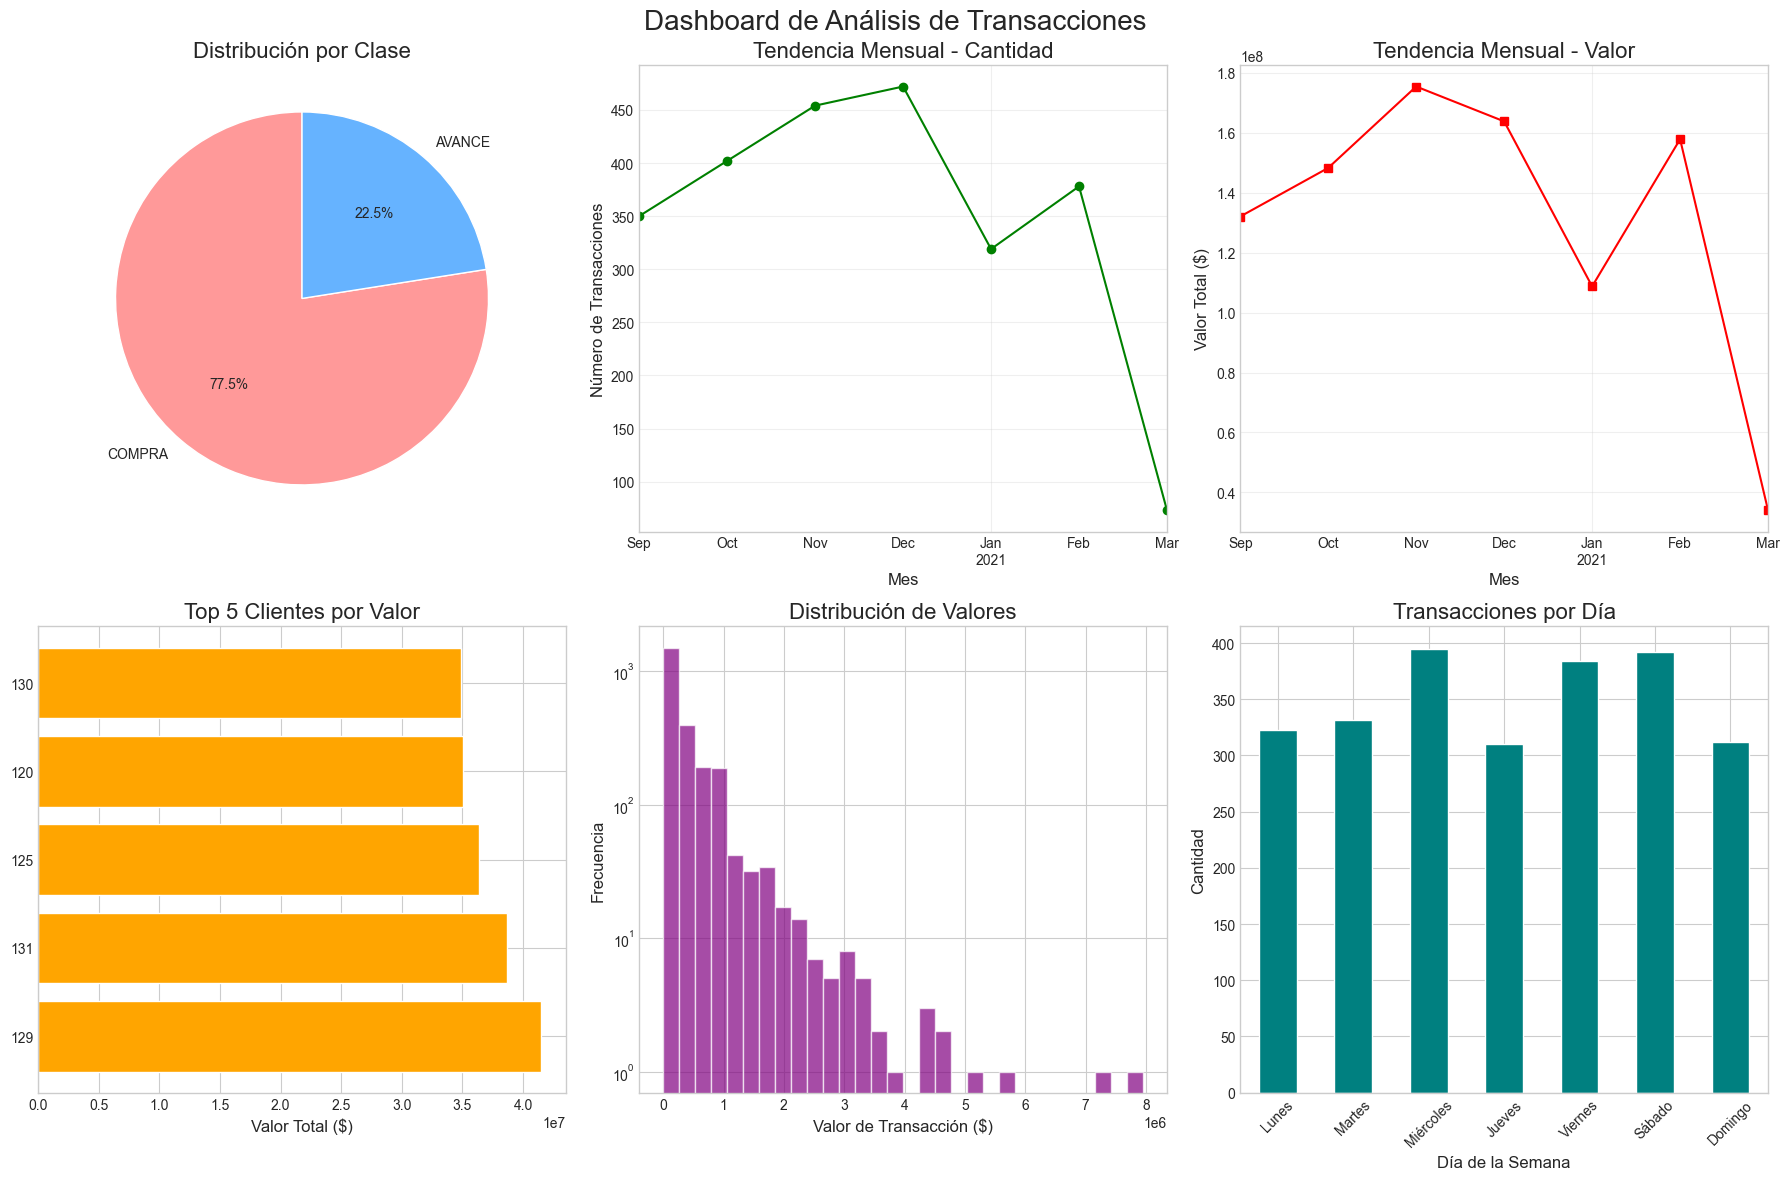


Análisis Completo de Visualizaciones Finalizado ✅


In [19]:
# --- 8. Dashboard de Métricas Clave ---
print("\n### 8. Dashboard de Métricas Clave ###")

# Crear un dashboard con múltiples métricas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Dashboard de Análisis de Transacciones', fontsize=20, y=0.98)

# Gráfico 1: Pie chart de distribución por clase
axes[0,0].pie(clase_counts.values, labels=clase_counts.index, autopct='%1.1f%%', 
              colors=['#ff9999','#66b3ff'], startangle=90)
axes[0,0].set_title('Distribución por Clase')

# Gráfico 2: Tendencia mensual de transacciones
monthly_summary['numero_transacciones'].plot(ax=axes[0,1], marker='o', color='green')
axes[0,1].set_title('Tendencia Mensual - Cantidad')
axes[0,1].set_xlabel('Mes')
axes[0,1].set_ylabel('Número de Transacciones')
axes[0,1].grid(True, alpha=0.3)

# Gráfico 3: Tendencia mensual de valores
monthly_summary['valor_total'].plot(ax=axes[0,2], marker='s', color='red')
axes[0,2].set_title('Tendencia Mensual - Valor')
axes[0,2].set_xlabel('Mes')
axes[0,2].set_ylabel('Valor Total ($)')
axes[0,2].grid(True, alpha=0.3)

# Gráfico 4: Top 5 clientes
top_5_clientes = stats_por_cliente.nlargest(5, 'Valor_Total')
axes[1,0].barh(range(len(top_5_clientes)), top_5_clientes['Valor_Total'], color='orange')
axes[1,0].set_yticks(range(len(top_5_clientes)))
axes[1,0].set_yticklabels(top_5_clientes.index)
axes[1,0].set_title('Top 5 Clientes por Valor')
axes[1,0].set_xlabel('Valor Total ($)')

# Gráfico 5: Distribución de valores (log scale)
df['valor'].hist(bins=30, ax=axes[1,1], alpha=0.7, color='purple')
axes[1,1].set_title('Distribución de Valores')
axes[1,1].set_xlabel('Valor de Transacción ($)')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].set_yscale('log')


# --- Cálculo de transacciones por día de la semana ---
# Este bloque define la variable 'transacciones_por_dia' que falta.

# 1. Extraer el nombre del día de la semana a partir de la fecha.
df['dia_semana'] = df['fecha_efectiva'].dt.day_name()

# 2. Definir el orden cronológico de los días para que el gráfico se muestre correctamente.
#    (Pandas por defecto devuelve los nombres en inglés).
dias_en_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['dia_semana'] = pd.Categorical(df['dia_semana'], categories=dias_en_orden, ordered=True)

# 3. Agrupar por el día de la semana y contar el número de transacciones.
transacciones_por_dia = df.groupby('dia_semana').agg(
    Cantidad=('Id_tx', 'count')
)

# 4. (Opcional) Si deseas traducir los nombres de los días a español para el gráfico:
nombres_dias_es = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
transacciones_por_dia.index = nombres_dias_es


# Gráfico 6: Métricas por día de la semana
transacciones_por_dia['Cantidad'].plot(kind='bar', ax=axes[1,2], color='teal')
axes[1,2].set_title('Transacciones por Día')
axes[1,2].set_xlabel('Día de la Semana')
axes[1,2].set_ylabel('Cantidad')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n==========================================================")
print("Análisis Completo de Visualizaciones Finalizado ✅")
